## Text Data Wrangling and Exploration

In [1]:
# Import the pandas library
import pandas as pd

# Read the dataset from a CSV file named "dataset.csv" into a pandas DataFrame named 'df'
df = pd.read_csv("dataset.csv")

In [2]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB
None


In [3]:
# Display summary statistics for numerical columns
print(df.describe())

                                              id  \
count                                     287113   
unique                                    287113   
top     0001d1afc246a7964130f43ae940af6bc6c57f01   
freq                                           1   

                                                  article  \
count                                              287113   
unique                                             284005   
top     (CNN) -- Dubai could lose its place on the Wom...   
freq                                                    3   

                                               highlights  
count                                              287113  
unique                                             282197  
top     This page includes the show Transcript and the...  
freq                                                   83  


In [4]:
# Display the DataFrame
print(df.head())

                                         id  \
0  0001d1afc246a7964130f43ae940af6bc6c57f01   
1  0002095e55fcbd3a2f366d9bf92a95433dc305ef   
2  00027e965c8264c35cc1bc55556db388da82b07f   
3  0002c17436637c4fe1837c935c04de47adb18e9a   
4  0003ad6ef0c37534f80b55b4235108024b407f0b   

                                             article  \
0  By . Associated Press . PUBLISHED: . 14:11 EST...   
1  (CNN) -- Ralph Mata was an internal affairs li...   
2  A drunk driver who killed a young woman in a h...   
3  (CNN) -- With a breezy sweep of his pen Presid...   
4  Fleetwood are the only team still to have a 10...   

                                          highlights  
0  Bishop John Folda, of North Dakota, is taking ...  
1  Criminal complaint: Cop used his role to help ...  
2  Craig Eccleston-Todd, 27, had drunk at least t...  
3  Nina dos Santos says Europe must be ready to a...  
4  Fleetwood top of League One after 2-0 win at S...  


In [5]:
# Display the shape of the DataFrame
df.shape

(287113, 3)

In [6]:
# Display the shape of the DataFrame before removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)

# Check for duplicate records based on all columns
duplicates = df[df.duplicated()]

# Print the number of duplicate records before removal
print("\nNumber of Duplicate Records before removal:", len(duplicates))

# Remove duplicate records and update the DataFrame
df = df.drop_duplicates()

# Display the shape of the DataFrame after removing duplicates
print("\nShape of DataFrame after removing duplicates:", df.shape)

Shape of DataFrame before removing duplicates: (287113, 3)

Number of Duplicate Records before removal: 0

Shape of DataFrame after removing duplicates: (287113, 3)


In [7]:
# Display the shape of the DataFrame before handling null values
print("\nShape of DataFrame before handling null values:", df.shape)

# Check for null values in each column
null_counts = df.isnull().sum()

# Calculate the percentage of null values for each column
null_percentage = (null_counts / len(df)) * 100

# Create a DataFrame to display null counts and percentages
null_info = pd.DataFrame({
    'Null Counts': null_counts,
    'Null Percentage': null_percentage
})

# Display the null information
print("\nNull Information:")
print(null_info)


Shape of DataFrame before handling null values: (287113, 3)

Null Information:
            Null Counts  Null Percentage
id                    0              0.0
article               0              0.0
highlights            0              0.0


In [13]:
# Save the DataFrame to a CSV file
csv_file_path = 'cleaned_data.csv'
df.to_csv(csv_file_path, index=False)

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_dataframe.csv')

# Function to clean and preprocess text
def clean_text(text):
    
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join the corrected tokens back into text
    cleaned_text = ' '.join(filtered_tokens)
    
    return cleaned_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thirumalan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thirumalan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Apply the clean_text function to the 'article' column
df['Cleaned_article'] = df['article'].apply(clean_text)

# Display the DataFrame with the cleaned text
print(df[['article', 'Cleaned_article']].head())

                                             article  \
0  By . Associated Press . PUBLISHED: . 14:11 EST...   
1  (CNN) -- Ralph Mata was an internal affairs li...   
2  A drunk driver who killed a young woman in a h...   
3  (CNN) -- With a breezy sweep of his pen Presid...   
4  Fleetwood are the only team still to have a 10...   

                                     Cleaned_article  
0  associated press published est october updated...  
1  cnn ralph mata internal affairs lieutenant mia...  
2  drunk driver killed young woman headon crash c...  
3  cnn breezy sweep pen president vladimir putin ...  
4  fleetwood team still record sky bet league one...  


In [11]:
# Apply the clean_text function to the 'highlights' column
df['Cleaned_highlights'] = df['highlights'].apply(clean_text)

# Display the DataFrame with the cleaned text
print(df[['highlights', 'Cleaned_highlights']].head())

                                          highlights  \
0  Bishop John Folda, of North Dakota, is taking ...   
1  Criminal complaint: Cop used his role to help ...   
2  Craig Eccleston-Todd, 27, had drunk at least t...   
3  Nina dos Santos says Europe must be ready to a...   
4  Fleetwood top of League One after 2-0 win at S...   

                                  Cleaned_highlights  
0  bishop john folda north dakota taking time dia...  
1  criminal complaint cop used role help cocaine ...  
2  craig ecclestontodd drunk least three pints dr...  
3  nina dos santos says europe must ready accept ...  
4  fleetwood top league one win scunthorpe peterb...  


In [12]:
# Save the DataFrame to a CSV file
csv_file_path = 'cleaned_dataset_1.csv'
df.to_csv(csv_file_path, index=False)


In [13]:
# Function to count words in a text
def count_words(text):
    return len(text.split())

In [15]:
# Calculate the number of words in each record
df['article_word_count'] = df['Cleaned_article'].apply(count_words)
df['highlights_word_count'] = df['Cleaned_highlights'].apply(count_words)

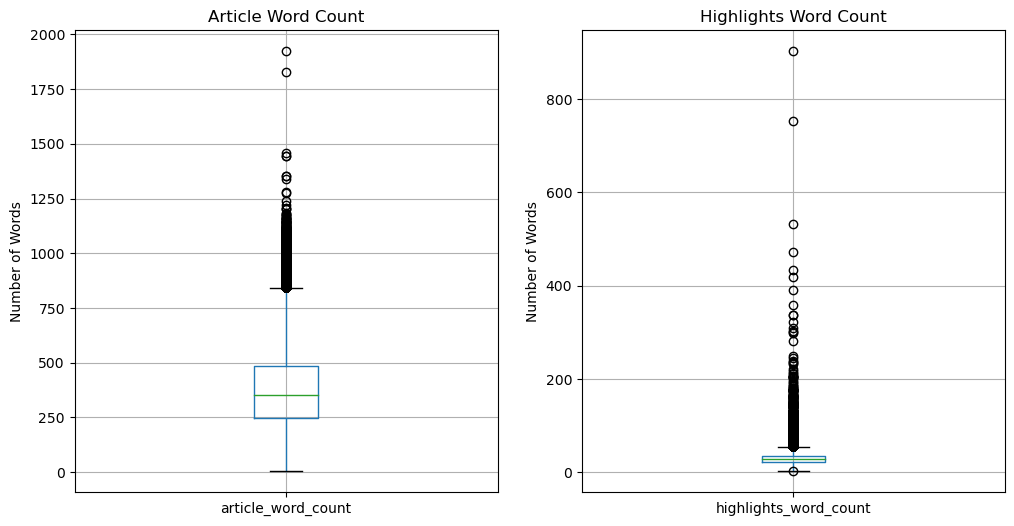

In [16]:
import matplotlib.pyplot as plt

# Create a box plot for the number of words in articles and highlights
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

df.boxplot(column='article_word_count', ax=axes[0])
axes[0].set_title('Article Word Count')
axes[0].set_ylabel('Number of Words')

df.boxplot(column='highlights_word_count', ax=axes[1])
axes[1].set_title('Highlights Word Count')
axes[1].set_ylabel('Number of Words')

plt.show()

In [21]:
# Remove outliers using the interquartile range (IQR) in the same DataFrame
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

In [22]:
# Remove outliers from both columns
remove_outliers('article_word_count')
remove_outliers('highlights_word_count')

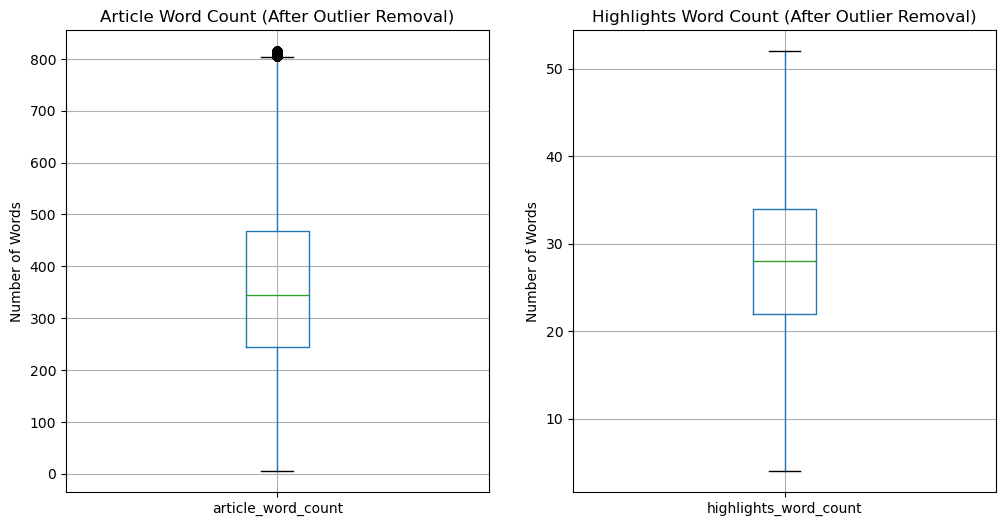

In [23]:
# Create a box plot for the number of words in articles and highlights after removing outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

df.boxplot(column='article_word_count', ax=axes[0])
axes[0].set_title('Article Word Count (After Outlier Removal)')
axes[0].set_ylabel('Number of Words')

df.boxplot(column='highlights_word_count', ax=axes[1])
axes[1].set_title('Highlights Word Count (After Outlier Removal)')
axes[1].set_ylabel('Number of Words')

plt.show()

In [24]:
# Display the shape of the DataFrame
df.shape

(283197, 7)

In [26]:
from wordcloud import WordCloud

# Function to generate and display word clouds
def generate_word_cloud(text_column, title):
    # Combine all the text into a single string
    combined_text = ' '.join(text_column)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(combined_text)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

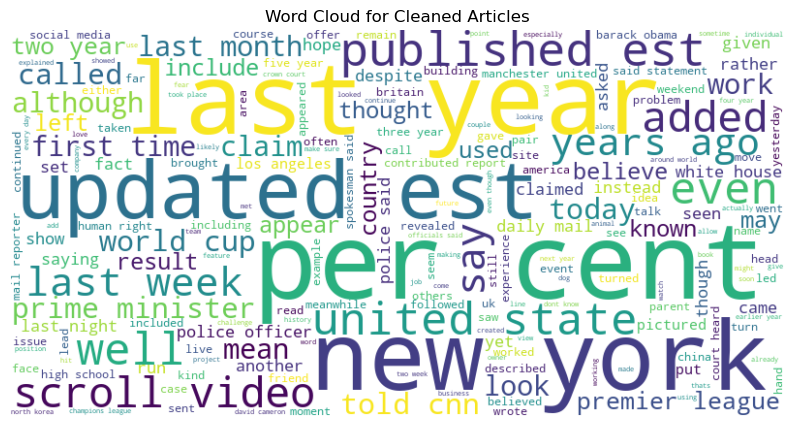

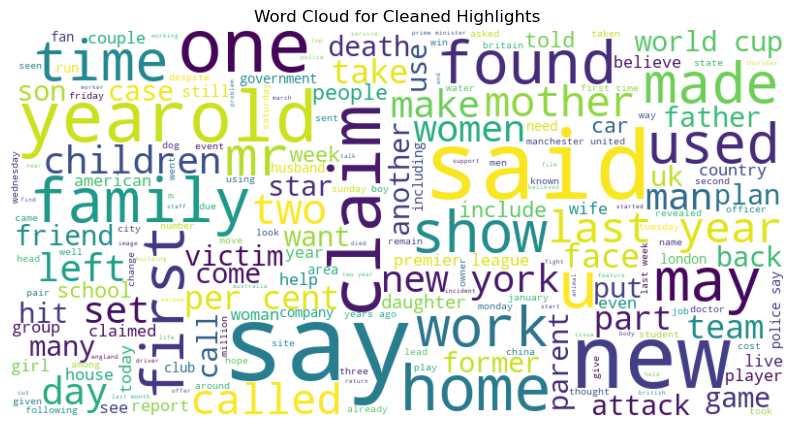

In [28]:
# Generate and display word cloud for cleaned_article
generate_word_cloud(df['Cleaned_article'], 'Word Cloud for Cleaned Articles')

# Generate and display word cloud for cleaned_highlights
generate_word_cloud(df['Cleaned_highlights'], 'Word Cloud for Cleaned Highlights')

In [29]:
# Function to calculate word counts and generate histograms
def plot_word_counts_histogram(text_column, title):
    word_counts = text_column.apply(lambda x: len(x.split()))
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

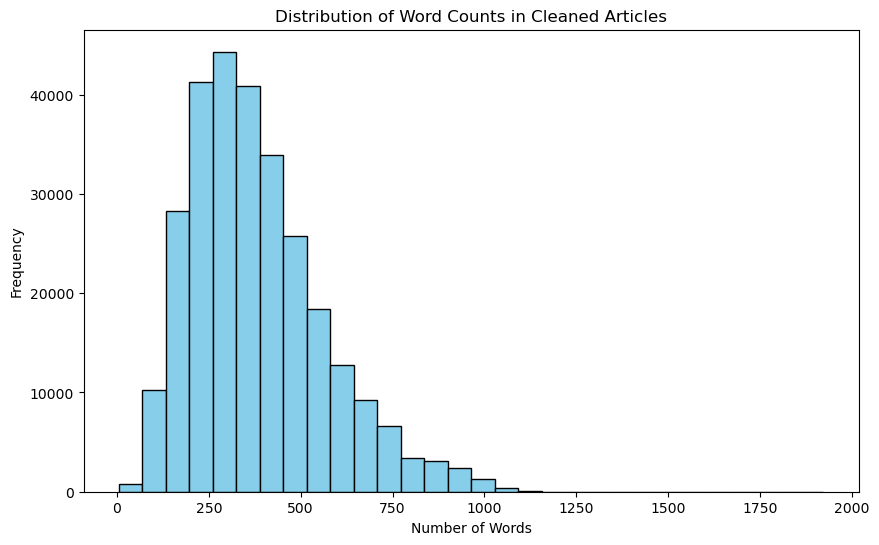

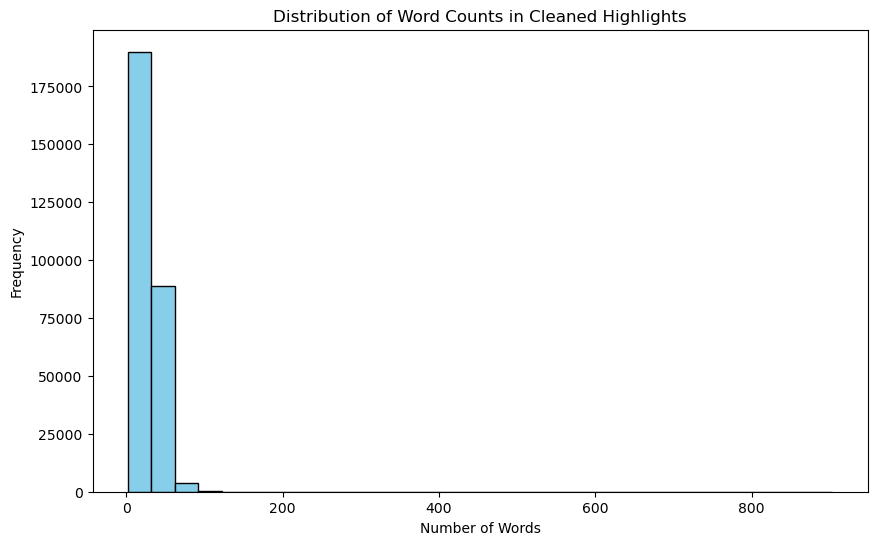

In [32]:
# Generate histograms for word counts in cleaned_article and cleaned_highlights
plot_word_counts_histogram(df['Cleaned_article'], 'Distribution of Word Counts in Cleaned Articles')
plot_word_counts_histogram(df['Cleaned_highlights'], 'Distribution of Word Counts in Cleaned Highlights')

In [36]:
# Save the DataFrame to a CSV file
csv_file_path = 'cleaned_dataset_2.csv'
df.to_csv(csv_file_path, index=False)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity
def calculate_similarity(article, highlights):
    # Create TfidfVectorizer
    vectorizer = TfidfVectorizer()
    
    # Fit and transform the text data
    tfidf_matrix = vectorizer.fit_transform([article, highlights])
    
    # Calculate cosine similarity
    similarity_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    
    return similarity_score

In [38]:
# Create a new column 'similarity_score' in the DataFrame
df['similarity_score'] = df.apply(lambda row: calculate_similarity(row['Cleaned_article'], row['Cleaned_highlights']), axis=1)

# Display the DataFrame with the new 'similarity_score' column
print(df[['Cleaned_article', 'Cleaned_highlights', 'similarity_score']])


                                          Cleaned_article  \
0       associated press published est october updated...   
1       cnn ralph mata internal affairs lieutenant mia...   
2       drunk driver killed young woman headon crash c...   
3       cnn breezy sweep pen president vladimir putin ...   
4       fleetwood team still record sky bet league one...   
...                                                   ...   
287108  james rush former first daughter chelsea clint...   
287109  apologetic vanilla ice given first proper inte...   
287110  americas lethal sniper claimed wished hed kill...   
287111  sara malm published est march updated est marc...   
287112  cnnformer florida gov jeb bush decided activel...   

                                       Cleaned_highlights  similarity_score  
0       bishop john folda north dakota taking time dia...          0.432732  
1       criminal complaint cop used role help cocaine ...          0.330195  
2       craig ecclestontodd drunk

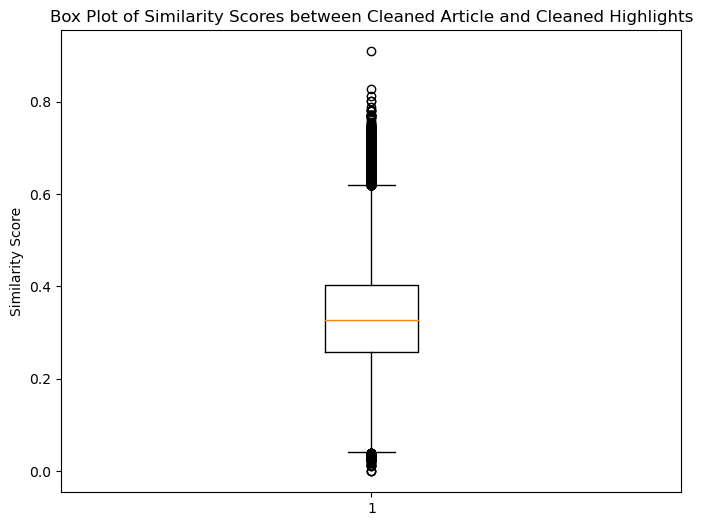

In [39]:
# Plot box plot for the similarity scores
plt.figure(figsize=(8, 6))
plt.boxplot(df['similarity_score'])
plt.title('Box Plot of Similarity Scores between Cleaned Article and Cleaned Highlights')
plt.ylabel('Similarity Score')
plt.show()